<a href="https://colab.research.google.com/github/IshanJain1211/Deep-Learning/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**
## **Artificial Neural Network for Image Classification**

In this assignment, we explore the fundamentals of building a neural network for image classification. Image classification is a core task in computer vision, where the goal is to correctly identify and categorize objects in images. We will design and implement a neural network from scratch using popular machine learning libraries, applying key concepts such as activation functions, and backpropagation. By training the model on a labeled dataset, we aim to evaluate its performance and understand how different network architectures influence classification accuracy. This assignment serves as a practical introduction to deep learning in computer vision.

====================================================================================================

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 1**

The code below imports essential libraries for building and training an artificial neural network (ANN) using PyTorch.
1) <blue>**torch**</blue> and <blue>**torch.nn**</blue> provide core functionality for tensors and neural networks.
2) <blue>**optim**</blue> offers optimization algorithms (like <green>**Adam**</green>).
3) <blue>**torchvision**</blue> helps with image-related tasks, and transforms aids in image preprocessing.
4) <blue>**DataLoader**</blue> is used to load datasets in batches.
5) Libraries like <blue>**matplotlib**</blue>, <blue>**seaborn**</blue>, and <blue>**sklearn.metrics**</blue> help visualize results and evaluate the model using metrics such as <green>**accuracy**</green>, <green>**precision**</green>, <green>**recall**</green> etc.

In [9]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 2**
1) The <blue>**device**</blue> variable ensures the model runs on a <green>**GPU**</green> if available; otherwise, it falls back to a <green>**CPU**</green>.
2) The <blue>**transform**</blue> object defines the <green>**preprocessing**</green> steps for images
3) <blue>**ToTensor()**</blue> converts images to tensors.
4) <blue>**Normalize((0.5,), (0.5,))**</blue> normalizes the images to a range between -1 and 1, helping with better convergence during training.

In [10]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 3**
1) This code outlines loading the <blue>**MNIST**</blue> dataset for <green>**handwritten digit recognition**</green>.
2) The <blue>**train_loader**</blue> and <blue>**test_loader**</blue> are used to load the datasets in batches of 64, with shuffling applied only to the training set.
3) The <blue>**dataiter**</blue> and next commands allow viewing a batch of images and labels, which can be useful for visualization before training.


Note: The placeholders **"None"** need to be replaced with the correct dataset-loading code.

In [11]:
# Load the MNIST dataset
# TODO: Download and load the training and test sets using torchvision.datasets

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# Visualize some images (Optional)
dataiter = iter(train_loader)
images, labels = next(dataiter)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classifying MNIST digits.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes (digits 0–9)**</green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [12]:
# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # TODO: Define the layers (Flatten, Fully Connected, Activation functions)
        in_feature=28*28
        h1=128
        h2=64
        out_feature=10
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # Replace None with the correct number of units
        self.fc2 = nn.Linear(128, 64)   # Replace None with the correct number of units
        self.fc3 = nn.Linear(64, 10)     # Output layer for 10 classes

    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(-1, 28*28)  # Flatten the image
        x = nn.functional.relu(self.fc1(x))  # First fully connected layer + activation
        x = nn.functional.relu(self.fc2(x))  # Second fully connected layer + activation
        x = self.fc3(x)  # Output layer
        return x

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like MNIST.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [13]:
# Initialize the model, loss function, and optimizer
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [15]:
# Training the network
num_epochs = 5
ls_losses = []
for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
        # TODO: Move images and labels to the device
          # Move images and labels to the device
          images = images.to(device)
          labels = labels.to(device)


        # Forward pass
          outputs = model(images)  # Forward pass through the model
          loss = criterion(outputs,labels)     # Compute the loss
          ls_losses.append(loss.detach().cpu().numpy())

        # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
        # None  # Backward pass
        # None  # Optimize the weights

          if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/938], Loss: 0.5729
Epoch [1/5], Step [200/938], Loss: 0.4266
Epoch [1/5], Step [300/938], Loss: 0.3273
Epoch [1/5], Step [400/938], Loss: 0.2061
Epoch [1/5], Step [500/938], Loss: 0.2811
Epoch [1/5], Step [600/938], Loss: 0.2707
Epoch [1/5], Step [700/938], Loss: 0.1729
Epoch [1/5], Step [800/938], Loss: 0.2273
Epoch [1/5], Step [900/938], Loss: 0.2195
Epoch [2/5], Step [100/938], Loss: 0.2291
Epoch [2/5], Step [200/938], Loss: 0.1371
Epoch [2/5], Step [300/938], Loss: 0.0793
Epoch [2/5], Step [400/938], Loss: 0.1594
Epoch [2/5], Step [500/938], Loss: 0.2048
Epoch [2/5], Step [600/938], Loss: 0.1240
Epoch [2/5], Step [700/938], Loss: 0.1626
Epoch [2/5], Step [800/938], Loss: 0.1387
Epoch [2/5], Step [900/938], Loss: 0.1840
Epoch [3/5], Step [100/938], Loss: 0.1554
Epoch [3/5], Step [200/938], Loss: 0.2807
Epoch [3/5], Step [300/938], Loss: 0.1414
Epoch [3/5], Step [400/938], Loss: 0.2051
Epoch [3/5], Step [500/938], Loss: 0.2927
Epoch [3/5], Step [600/938], Loss:

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

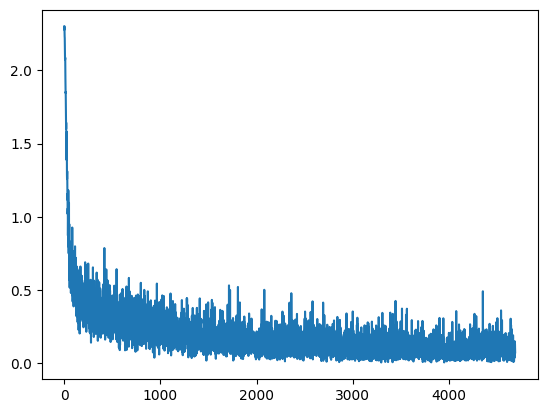

In [16]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Accuracy Calculation**</blue>: The model's predictions are compared to the true labels, and the <green>**accuracy**</green> is calculated.
4) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

At the end of testing, the accuracy of the model on the test dataset is printed.

Note: Replace the placeholders **"None"** with the appropriate code for data movement, prediction, and storing results.

In [22]:
# Testing the model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # TODO: Move images and labels to the device
        # images = None  # Replace None with code to move images to device and flatten
        # labels = None  # Move labels to device
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images) # Forward pass through the model
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print(type(predicted), predicted.shape)
        # print(type(labels), labels.shape)
        # TODO: Append predictions and labels for metrics
        all_preds.extend(predicted)  # Append predictions to the list
        all_labels.extend(labels)  # Append actual labels to the list

    print(f'Accuracy of the network on the test images: {100 * correct / total}%')

Accuracy of the network on the test images: 96.53%


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 9**
This code calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

Accuracy: 96.53%
Precision: 0.9660
Recall: 0.9653
F1-Score: 0.9653


TypeError: 'str' object is not callable

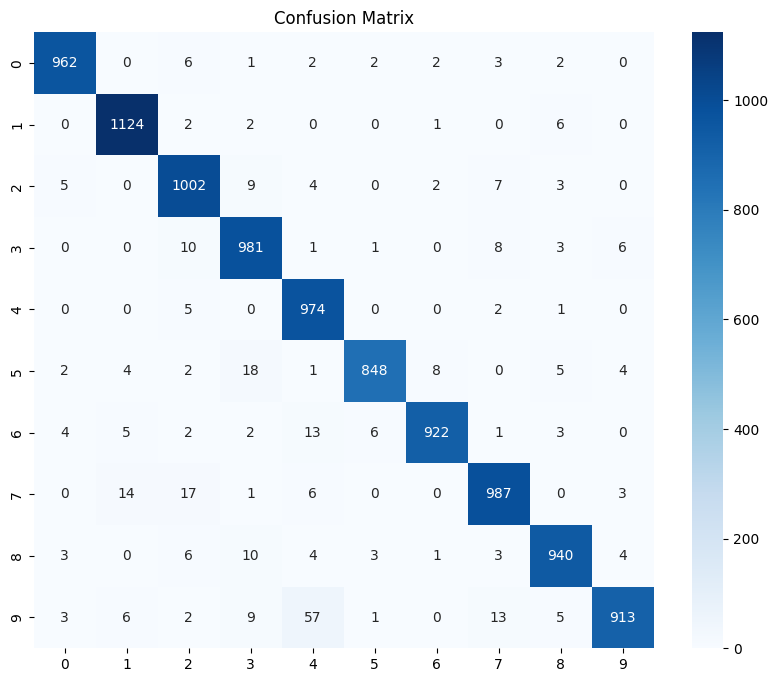

In [25]:
# TODO: Convert predictions and labels to numpy arrays for metric calculation
# Ensure that all tensors in all_preds and all_labels are at least 1D
all_preds = [pred.unsqueeze(0) if pred.dim() == 0 else pred for pred in all_preds]
all_labels = [label.unsqueeze(0) if label.dim() == 0 else label for label in all_labels]

all_preds = torch.cat(all_preds).detach().cpu().numpy()  # Convert predictions to numpy array
all_labels = torch.cat(all_labels).detach().cpu().numpy()   # Replace None with correct code to convert to numpy array

# Calculate accuracy, precision, recall, and F1-score
# TODO: Use sklearn to calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels,all_preds) # Replace None with the correct calculation
precision = precision_score(all_labels,all_preds, average='weighted')  # Replace None with the correct calculation
recall = recall_score(all_labels,all_preds, average='weighted')  # Replace None with the correct calculation
f1 = f1_score(all_labels,all_preds, average='weighted')  # Replace None with the correct calculation

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# TODO: Confusion matrix calculation
conf_matrix = confusion_matrix(all_labels,all_preds)  # Replace None with correct code to compute the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()